<a href="https://colab.research.google.com/github/Teoroo-CMC/DoE_Course_Material/blob/main/Week_2/Workshop_3/Jupyter-notebooks/DoE-2factor_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from numpy.random import rand

# Design of experiments 



## Inputs and Responses
In this example, we investigate a problem often encoundered in engineering. A product is pdoduces using a specific infill, and orientation anwith a nozzle of a certain diameter. All taken together, their settings give rize to a responce which becomes a measure of the quality of the product. A higher response results in higher quality. 


## Two-level full factorial design
To find which parameters that will have most influence on the quality, we need to perform experiments. For this purpose, lets consider a a two-level, three-variable experimental design - also written as 2$^3$, with n=2 levels for each factor,  k=3 different factors. We start by encoding each fo the three variables to something generic: (x1,x2,x3). A dataframe with input variable values is then populated.

In this design, each observation data point consists of three input variable values and an output variable value, (A,B,C,y), and can be thought of as a point in 3D space (A,B,C) with an associated point value of y. Alternatively, this might be thought of as a point in 4D space (the first three dimensions are the location in 3D space where the point will appear, and the y value is when it will actually appear).


In [187]:
inputs_labels = {'A' : 'Infill',
                 'B' : 'Orientation',
                 'C' : 'Nozzle Diameter'}

dat = [('A',5,100),
       ('B',0,90),
       ('C',0.2,1)]

inputs_df = pd.DataFrame(dat,columns=['index','low','high'])
inputs_df = inputs_df.set_index(['index'])
inputs_df['label'] = inputs_df.index.map( lambda z : inputs_labels[z] )

inputs_df

,low,high,label
index,,,
A,5.0,100,Infill
B,0.0,90,Orientation
C,0.2,1,Nozzle Diameter


We encode the variable values. For an arbitrary variable value  $\phi_i$, the value of the variable can be coded to be between -1 and 1 according to the formula:

\begin{equation}
x_i = \frac{\phi_i-avg(\phi)}{span(\phi)}
\end{equation}

where the average and the span of the variable $\phi_i$ are defined as: 

\begin{equation}
avg(\phi) = \frac{\phi_{high}+\phi_{low}}{2}
\end{equation}

\begin{equation}
span(\phi) = \frac{\phi_{high}-\phi_{low}}{2}
\end{equation}

In [188]:
inputs_df['average'] = inputs_df.apply( lambda z : ( z['high'] + z['low'])/2 , axis=1)
inputs_df['span'] = inputs_df.apply( lambda z : ( z['high'] - z['low'])/2 , axis=1)

inputs_df['encoded_low'] = inputs_df.apply( lambda z : ( z['low']  - z['average'] )/( z['span'] ), axis=1)
inputs_df['encoded_high'] = inputs_df.apply( lambda z : ( z['high'] - z['average'] )/( z['span'] ), axis=1)

inputs_df = inputs_df.drop(['average','span'],axis=1)

inputs_df

,low,high,label,encoded_low,encoded_high
index,,,,,
A,5.0,100,Infill,-1.0,1.0
B,0.0,90,Orientation,-1.0,1.0
C,0.2,1,Nozzle Diameter,-1.0,1.0


The input variable values consist of all possible input value combinations, which we can produce using the itertools module:

In [189]:
import itertools
# we have four repetitions
encoded_inputs= list(itertools.product([-1,1],[-1,1],[-1,1]) )
encoded_inputs

[(-1, -1, -1),
 (-1, -1, 1),
 (-1, 1, -1),
 (-1, 1, 1),
 (1, -1, -1),
 (1, -1, 1),
 (1, 1, -1),
 (1, 1, 1)]

Now we implement the observed outcomes:

In [190]:
repetitions=4
y1= [8,26.2,14.8,44,16.6,28.2,14.8,42.2] 
y2= [9.2,33.6,15.2,44,12.4,24.4,15,43.2]
y3= [14.2,40,16,45,12.8,24.4,14.6,41.8]
y4= [10.6,28.8,15.2,43.8,14,23.2,20.8,41]
y=[8,26.2,14.8,44,16.6,28.2,14.8,42.2,9.2,33.6,15.2,44,12.4,24.4,15,43.2,14.2,40,16,45,12.8,24.4,14.6,41.8,10.6,28.8,15.2,43.8,14,23.2,20.8,41]

In [195]:
results=pd.DataFrame(encoded_inputs,columns=['A','B','C'])
results['y1']=y1
results['y2']=y2
results['y3']=y3
results['y4']=y4
results['ybar']= results.iloc[:, 3:7].mean(axis=1)
results 

,A,B,C,y1,y2,y3,y4,ybar
0,-1,-1,-1,8.0,9.2,14.2,10.6,10.50
1,-1,-1,1,26.2,33.6,40.0,28.8,32.15
2,-1,1,-1,14.8,15.2,16.0,15.2,15.30
3,-1,1,1,44.0,44.0,45.0,43.8,44.20
4,1,-1,-1,16.6,12.4,12.8,14.0,13.95
5,1,-1,1,28.2,24.4,24.4,23.2,25.05
6,1,1,-1,14.8,15.0,14.6,20.8,16.30
7,1,1,1,42.2,43.2,41.8,41.0,42.05


The variable inputs_df contains all input variables for the expeirment design, and results_df contains the inputs and responses for the experiment design; these variables are the encoded levels. To obtain the original, unscaled values, which allows us to check what experiments must be run, we can always convert the dataframe back to its originals by defining a function to un-apply the scaling equation. This is as simple as finding

In [196]:
real_experiment = results

var_labels = []
for var in ['A','B','C']:
    var_label = inputs_df.loc[var]['label']
    var_labels.append(var_label)
    real_experiment[var_label] = results.apply(
        lambda z : inputs_df.loc[var]['low'] if z[var]<0 else inputs_df.loc[var]['high'] , 
        axis=1)

print("The values of each real variable in the experiment:")
real_experiment[var_labels]

The values of each real variable in the experiment:


,Infill,Orientation,Nozzle Diameter
0,5.0,0.0,0.2
1,5.0,0.0,1.0
2,5.0,90.0,0.2
3,5.0,90.0,1.0
4,100.0,0.0,0.2
5,100.0,0.0,1.0
6,100.0,90.0,0.2
7,100.0,90.0,1.0


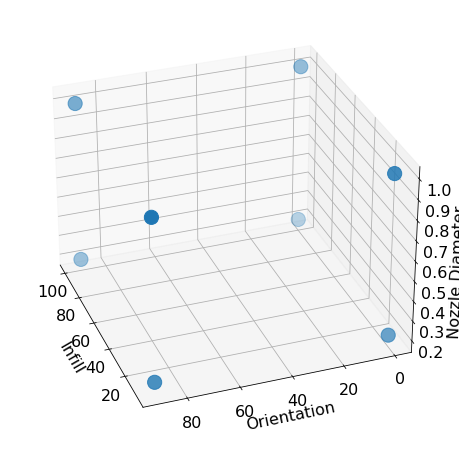

In [238]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})
# plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(real_experiment.Infill,
             real_experiment.Orientation,
             real_experiment['Nozzle Diameter'],
           s=200)
ax.set_xlabel('Infill')
ax.set_ylabel('Orientation')
ax.set_zlabel('Nozzle Diameter');
ax.view_init(30, 160)
plt.show()

# Computing main effects

Now we compute the main effects of each variable using the results of the experimental design. We'll use some shorthand Pandas functions to compute these averages: the groupby function, which groups rows of a dataframe according to some condition (in this case, the value of our variable of interest  x$_i$ ).

In [197]:
# Compute the mean effect of the factor on the response,
# conditioned on each variable
labels = ['A','B','C']

main_effects = {}
rep=4
for j in range(0,rep):
    index=j+1
    for key in labels:
        effects = results.groupby(key)['y'+str(index)].mean()
        main_effects[j,key] = sum( [i*effects[i] for i in [-1,1]])
        
print('Main effects')    
print(main_effects)

average_main_effects = {}

print('Average main effects')
for key in labels:
        average_effects = results.groupby(key)['ybar'].mean()
        average_main_effects[key] = sum( [i*average_effects[i] for i in [-1,1]])
print(average_main_effects)

Main effects
{(0, 'A'): 2.200000000000003, (0, 'B'): 9.2, (0, 'C'): 21.600000000000005, (1, 'A'): -1.75, (1, 'B'): 9.450000000000003, (1, 'C'): 23.349999999999998, (2, 'A'): -5.400000000000002, (2, 'B'): 6.5, (2, 'C'): 23.4, (3, 'A'): 0.14999999999999858, (3, 'B'): 11.05, (3, 'C'): 19.050000000000004}
Average main effects
{'A': -1.2000000000000028, 'B': 9.049999999999997, 'C': 21.849999999999998}


# Analyzing Main Effects
The main effect of a given variable (as defined by Yates 1937) is the average difference in the level of response as the input variable moves from the low to the high level. If there are other variables, the change in the level of response is averaged over all combinations of the other variables.

Now that we've computed the main effects, we can analyze the results to glean some meaningful information about our system. The first variable A has a negative effect of -1.65 - this indicates that when A goes from its low level to its high level, it decreases the value of the response. This means A should be increased, if we want an increased response. However, this effect was the smallest, meaning it's might have a very small effect on the response.

This might be the case if, for example, changing the value of the input variables were capital-intensive. A company might decide that they can only afford to change one variable, A, B, or C. If this were the case, increasing A would not be the way to go.

In contrast, increasing the variables B and C will result in an increase in the response, since these have a positive main effect. These variables should be kept at their higher levels, or increased, to increase the response.

## Two-Way Interactions
In addition to main effects, a factorial design will also reveal interaction effects between variables - both two-way interactions and three-way interactions. We can use the itertools library to compute the interaction effects using the results from the factorial design.

We'll use the Pandas groupby function again, grouping by two variables this time.

In [199]:
import itertools

twoway_labels = list(itertools.combinations(labels, 2))


twoway_effects = {}
for key in twoway_labels:
    
    effects = results.groupby([key[0],key[1]])['ybar'].mean()
    
    twoway_effects[key] = sum([ i*j*effects[i][j]/2 for i in [-1,1] for j in [-1,1] ])

    # This somewhat hairy one-liner takes the mean of a set of sum-differences
    #twoway_effects[key] = mean([  sum([ i*effects[i][j] for i in [-1,1] ]) for j in [-1,1]  ])

twoway_effects

{('A', 'B'): 0.6249999999999982,
 ('A', 'C'): -3.4250000000000007,
 ('B', 'C'): 5.475000000000001}

This one-liner is a bit hairy:

```
twoway_effects[key] = sum([ i*j*effects[i][j]/2 for i in [-1,1] for j in [-1,1] ])
```

What this does is, computes the two-way variable effect with a multi-step calculation, but does it with a list comprehension. 

First, let's just look at this part:

```
i*j*effects[i][j]/2 for i in [-1,1] for j in [-1,1]
```
This computes the prefix i*j, which determines if the interaction effect effects[i][j] is positive or negative. We're also looping over one additional dimension; we multiply by 1/2 for each additional dimension we loop over. These are all summed up to yield the final interaction effect for every combination of the input variables.

If we were computing three-way interaction effects, we would have a similar-looking one-liner, but with i, j, and k:
```
i*j*k*effects[i][j][k]/4 for i in [-1,1] for j in [-1,1] for k in [-1,1]
```

## Analyzing Two-Way Interactions

As with main effects, we can analyze the results of the interaction effects analysis to come to some useful conclusions about our physical system. A two-way interaction is a measure of how the main effect of one variable changes as the level of another variable changes. A negative two-way interaction between A and C means that if we increase  C, the main effect of A will be to decrease the response; or, alternatively, if we increase A, the main effect of C will be to decrease the response.

In this case, we see that the B−C interaction effect is the largest, and it is positive. This means that if we increase both B and C, it will increase our response - make the equipment last longer. 


## Three-Way Interactions
Now let's comptue the three-way effects (in this case, we can only have one three-way effect, since we only have three variables). We'll start by using the itertools library again, to create a tuple listing the three variables whose interactions we're computing. Then we'll use the Pandas groupby() feature to partition each output according to its inputs, and use it to compute the three-way effects.

In [200]:
import itertools

threeway_labels = list(itertools.combinations(labels, 3))

threeway_effects = {}
for key in threeway_labels:
    
    effects = results.groupby([key[0],key[1],key[2]])['ybar'].mean()
    
    threeway_effects[key] = sum([ i*j*k*effects[i][j][k]/4 for i in [-1,1] for j in [-1,1] for k in [-1,1] ])

threeway_effects

{('A', 'B', 'C'): 1.8499999999999979}

In [201]:
effects=[] #pd.DataFrame({})
indexes=[]
for i,k in enumerate(average_main_effects.keys()):
    effects.append(abs(average_main_effects[k]))
    indexes.append(k)
for i,k in enumerate(twoway_effects.keys()):
    effects.append(abs(twoway_effects[k]))
    indexes.append(k)
for i,k in enumerate(threeway_effects.keys()):
    effects.append(abs(threeway_effects[k]))
    indexes.append(k)    
    
effects_df=pd.DataFrame({"Standardized effect":effects})

# reset the indexes
effects_df.index=indexes
# Sort values in descending order
effects_df = effects_df.sort_values(by='Standardized effect', ascending=False)
# Add cumulative percentage column
effects_df["cum_percentage"] = round(effects_df["Standardized effect"].cumsum()/effects_df["Standardized effect"].sum()*100,2)

# Display data frame
effects_df

,Standardized effect,cum_percentage
C,21.850,50.26
B,9.050,71.08
"(B, C)",5.475,83.67
"(A, C)",3.425,91.55
"(A, B, C)",1.850,95.80
A,1.200,98.56
"(A, B)",0.625,100.00


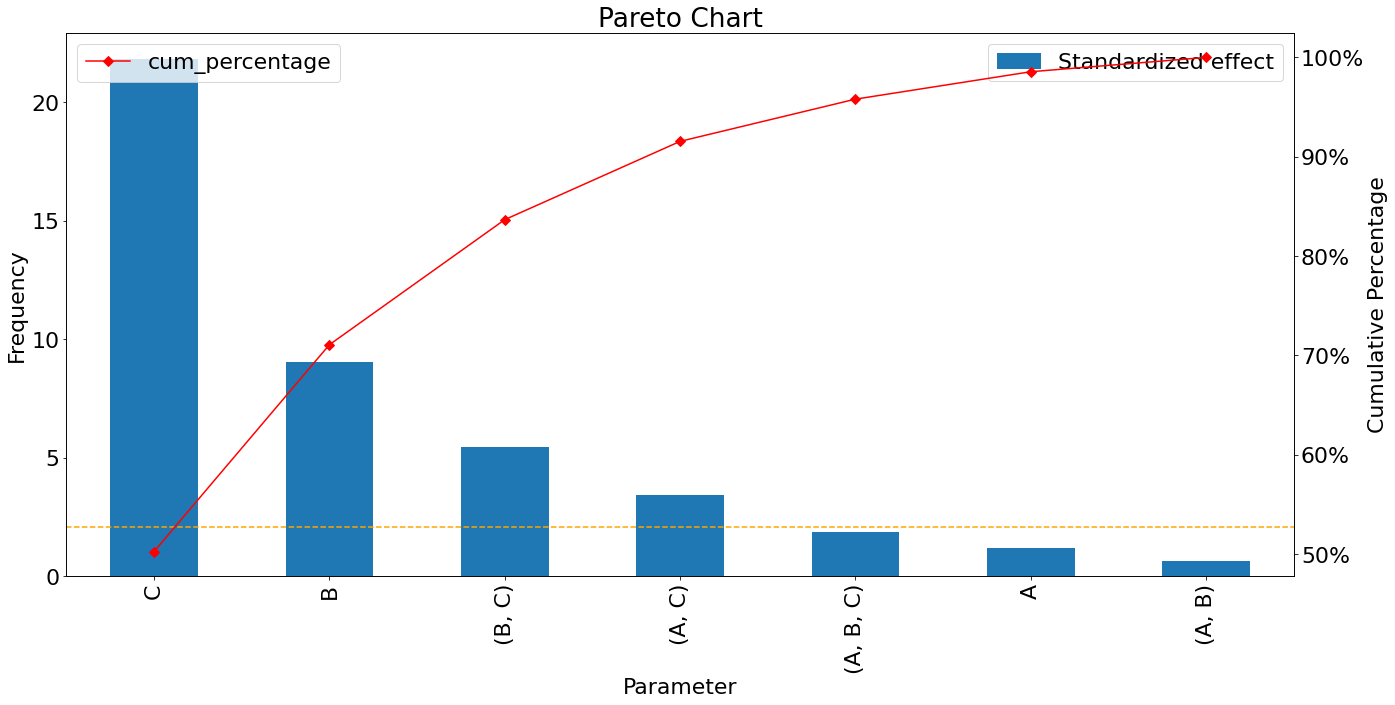

In [234]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
plt.rcParams.update({'font.size': 22})
# Set figure and axis
fig, ax = plt.subplots(figsize=(22,10))

# Plot bars (i.e. frequencies)
ax.set_title("Pareto Chart")
ax.set_xlabel("Parameter")
ax.set_ylabel("Frequency");
effects_df.plot.bar(y='Standardized effect', ax=ax)
ax.axhline(2.06, color="orange", linestyle="dashed")

# Second y axis (i.e. cumulative percentage)
ax2 = ax.twinx()
#ax2.plot(effects_df.index, effects_df["cum_percentage"], color="red", marker="D", ms=7)
effects_df.plot(y="cum_percentage", color="red", marker="D", ms=7, ax=ax2)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel("Cumulative Percentage");

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3)

#add DataFrames to subplots
effects_df['A'.plot(ax=axes[0,0])
effects_df.plot(ax=axes[0,1])
effects_df.plot(ax=axes[1,0])
effects_df.plot(ax=axes[1,1])

## Analysis of Three-Way Effects
While three-way interactions are relatively rare, typically smaller, and harder to interpret, a negative three-way interaction esssentially means that increasing these variables, all together, will lead to interactions which lower the response (the lifespan of the equipment), and the opposite for positive values.

# Fitting a Polynomial Response Surface
While identifying general trends and the effects of different input variables on a system response is useful, it's more useful to have a mathematical model for the system. The factorial design we used is designed to get us coefficients for a linear model  $\hat{y}$ that is a linear function of input variables x$_i$, and that predicts the actual system response  y:

\begin{equation}
\hat{y}=a_0+a_1x_1+a_2x_2+a_3x_3+a_{12}x_1x_2+a_{13}x_1x_3+a_{23}x_2x_3+a_{123}x_1x_2x_3
\end{equation} 

To determine these coefficients, we can obtain the effects we computed above. When we computed effects, we defined them as measuring the difference in the system response that changing a variable from -1 to +1 would have. Because this quantifies the change per two units of x, and the coefficients of a polynomial quantify the change per one unit of x, the effect must be divided by two.

In [128]:
s = "yhat = "

s += "%0.3f "%(results['ybar'].mean())

for i,k in enumerate(average_main_effects.keys()):
    if(average_main_effects[k]<0):
        s += "%0.3f %s "%( average_main_effects[k]/2.0, k )
    else:
        s += "+ %0.3f %s "%( average_main_effects[k]/2.0, k )

for i,k in enumerate(twoway_effects.keys()):
    if(twoway_effects[k]<0):
        s += " %0.3f %s %s"%( twoway_effects[k]/2.0, k[0],k[1])
    else:
        s += "+ %0.3f %s %s"%( twoway_effects[k]/2.0, k[0],k[1])

for i,k in enumerate(threeway_effects.keys()):
    if(threeway_effects[k]<0):
        s += " %0.3f %s %s %s"%( threeway_effects[k]/2.0, k[0],k[1], k[2])
    else:
        s += "+ %0.3f %s %s %s"%( threeway_effects[k]/2.0, k[0],k[1], k[2])


print(s)

yhat = 25.025 -0.825 A + 4.192 B + 11.392 C + 0.208 A B -1.558 A C+ 2.758 B C+ 1.208 A B C


# The Impact of Uncertainty
The main and interaction effects give us a more quantitative idea of what variables are important, yes. They can also be important for identifying where a model can be improved (if an input is linked strongly to a system response, more effort should be spent understanding the nature of the relationship).

But there are still some practical considerations missing from the implementation above. Specifically, in the real world it is impossible to know the system repsonse, y, perfectly. Rather, we may measure the response with an instrument whose uncertainty has been quantified, or we may measure a quantity multiple times (or both). How do we determine the impact of that uncertainty on the model?

Ultimately, factorial designs are based on the underlying assumption that the response y is a linear function of the inputs  x$_i$. Thus, for the three-factor full factorial experiment design, we are collecting data and running experiments in such a way that we obtain a model $\hat{y}$ for our system response y, and  $\hat{y}$ is a linear function of each factor:

\begin{equation}
y^=a0+a1x1+a2x2+a3x3
\end{equation}

The experiment design allows us to obtain a value for each coefficient a0, a1, etc. that will fit $\hat{y}$ to y to the best of its abilities.

Thus, uncertainty in the measured responses y propagates into the linear model in the form of uncertainty in the coefficients  a0, a1, etc.

## Uncertainty Numbers
To obtain an estimate of the uncertainty, the experimentalist will typically make several measurements at the center point, that is, where all parameter levels are 0. The more samples are taken at this condition, the better characterized the distribution of uncertainty becomes. These center point samples can be used to construct a Gaussian probability distribution function, which yeilds a variance,  $\sigma^2$ (or, to be proper, an estimate  s^2  of the real variance  $\sigma^2$). This parameter is key for quantifying uncertainty.

## Using Uncertainty Measurements
Suppose we measure  $s^2$ = 0.0050. Now what?

Now we can obtain the variance of all measurements, and the variance in the effects that we computed above. These are computed via:

\begin{equation}
Var_{mean} = V(\bar{y}) = \frac{\sigma^2}{2^k}
\end{equation}

\begin{equation}
Var_{effect}=\frac{4\sigma^2}{2^k}
\end{equation}



In [129]:
sigmasquared = 0.0050
k = len(inputs_df.index)
Vmean = (sigmasquared)/(2**k)
Veffect = (4*sigmasquared)/(2**k)
print("Variance in mean: %0.6f"%(Vmean))
print("Variance in effects: %0.6f"%(Veffect))

Variance in mean: 0.000625
Variance in effects: 0.002500


Alternatively, if the responses y are actually averages of a given number r of  y-observations,  $\bar{y}, then the variance will shrink:


\begin{equation}
Var_{mean} = V(\bar{y}) = \frac{\sigma^2}{r2^k}
\end{equation}
​
\begin{equation}
Var_{effect}=\frac{4\sigma^2}{r2^k}
\end{equation}
​


In [130]:
sigmasquared = 0.0050
r=4
k = len(inputs_df.index)
Vmean = (sigmasquared)/(r*2**k)
Veffect = (4*sigmasquared)/(r*2**k)
print("Variance in mean: %0.6f"%(Vmean))
print("Variance in effects: %0.6f"%(Veffect))

Variance in mean: 0.000156
Variance in effects: 0.000625


The variance gives us an estimate of $\sigma^2$, and if we have sigma squared we can obtain sigma. Sigma is the quantity that represents the range of response values that captures 1 sigma, or 66\%, of the probable values of y with  $\hat{y}. Adding a plus or minus sigma means we are capturing 2 sigma, or 95\%, of the probable values ofy.

Taking the square root of the variance gives $\sigma$:

In [131]:
print(np.sqrt(Vmean))
print(np.sqrt(Veffect))

0.0125
0.025


## Accounting for Uncertainty in Model
Now we can convert the values of the effects, and the values of  $\sigma$, to values for the final linear model:

\begin{equation}
\hat{y}=a0+a1x1+a2x2+a3x3+a12x1x2+a13x1x3+a23x2x3+a123x1x2x3
\end{equation} 

We begin with the case where each variable value is at its middle point (all non-constant terms are 0), and

\begin{equation}
\hat{y}=a0
\end{equation} 
 
In this case, the standard error is  ±σ
  as computed for the mean (or overall) system response,

\begin{equation}
\hat{y}=a_0 \pm \sigma_{mean}
\end{equation} 
 
where  

\begin{equation}
\sigma_{mean}=\sqrt{Var_{mean}}
\end{equation} 
 .



In [132]:
unc_a_0 = np.sqrt(Vmean)
print(unc_a_0)

0.0125


# Discussion
At this point, we would usually dive deeper into the details of the actual problem of interest. By trying the empirical model to the system, we can draw conclusions about the physical system - for example, if we were analyzing a chemically reacting process, and we found the response to be particularly sensitive to temperature, it would indicate that the chemical reaction is sensitive to temperature, and that the reaction should be studied more deeply (in isolation from the more complicated system) to better understand the impact of temperature on the response.

It's also valuable to explore the linear model that we obtained more deeply, by looking at contours of the response surface, taking first derivatives, and optimizing the input variable values to maximize or minimize the response value. We'll leave those tasks for later, and illustrate them in later notebooks.

At this point we have accomplished the goal of illustrating the design, execution, and analysis of a two-level, three-factor full factorial experimental design, so we'll leave things at that.

## Conclusion
In this notebook, we've covered a 2-level, three-factor factorial design from start to finish, including incorporation of uncertainty information. The design of the experiment was made simple by using the itertools and pandas libraries, and we showed how to transform variables to have low and high levels, as well as demonstrating a system response transformation. The results were analyzed to obtain a linear polynomial model.

However, this process was a bit cumbersome. What we'll see in later notebooks is that we can use Python modules designed for statistical modeling to fit linear models to data using least squares and regression, and carry the analysis further.